# KNN
fruit data with colors

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

Separate training and test sets

In [18]:
fruits_df=pd.read_table('fruit_data_with_colors.txt')
print(fruits_df)
print('Sample number:',len(fruits_df))

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

Create a dictionary of target labels and names

In [23]:
fruits_name_dict=dict(zip(fruits_df['fruit_label'],fruits_df['fruit_name']))
print(fruits_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


divide the dataset

In [27]:
X=fruits_df[['mass','width','height','color_score']]
print(X.head(5))

   mass  width  height  color_score
0   192    8.4     7.3         0.55
1   180    8.0     6.8         0.59
2   176    7.4     7.2         0.60
3    86    6.2     4.7         0.80
4    84    6.0     4.6         0.79


In [30]:
y=fruits_df['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=0)
print('X_train=\n',X_train.head(5))
print('y_train=\n',y_train.head(5))
print('Data sample：{},training set：{},test set：{}'.format(len(X),len(X_train),len(X_test)))

X_train=
     mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80
y_train=
 42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64
Data sample：59,training set：44,test set：15


Check feature relationship

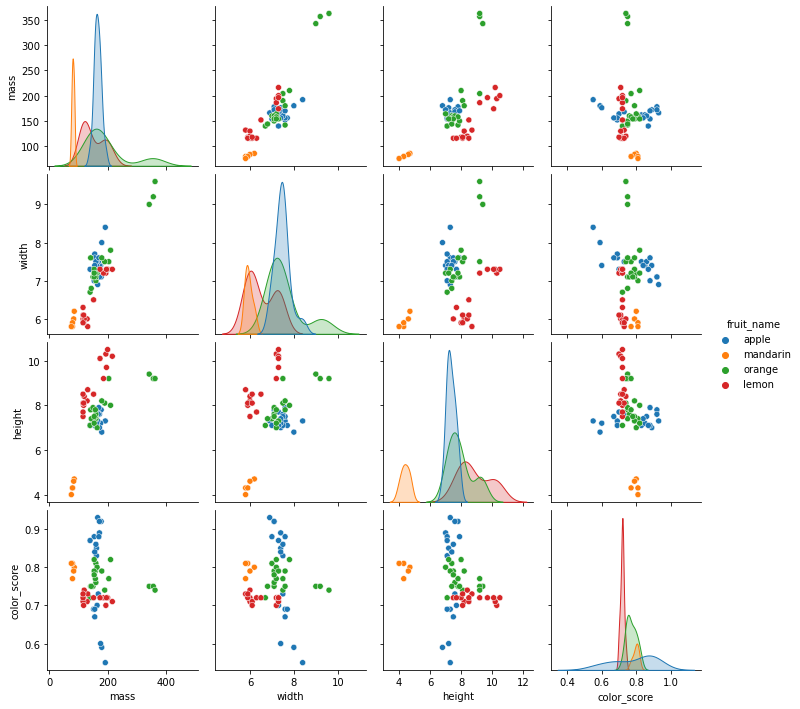

In [36]:
g=sns.pairplot(data=fruits_df,hue='fruit_name',vars=['mass','width','height','color_score'])

It can be seen that the diagonal line is the histogram of each class, and the mass and width are almost linearly related

colors=
 ['blue', 'yellow', 'green', 'red', 'blue', 'yellow', 'blue', 'blue', 'yellow', 'red', 'yellow', 'blue', 'red', 'green', 'blue', 'red', 'yellow', 'red', 'yellow', 'red', 'red', 'blue', 'red', 'yellow', 'yellow', 'yellow', 'blue', 'red', 'red', 'yellow', 'blue', 'green', 'red', 'blue', 'red', 'red', 'red', 'blue', 'yellow', 'green', 'red', 'yellow', 'yellow', 'yellow']


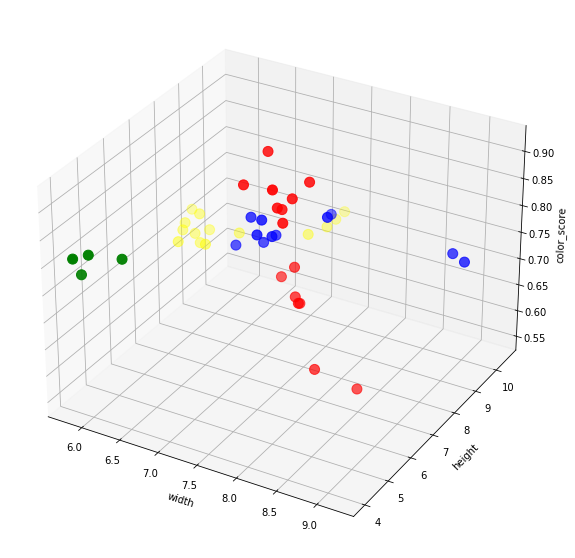

In [40]:
label_color_dict={1:'red',2:'green',3:'blue',4:'yellow'}
colors=list(map(lambda label: label_color_dict[label],y_train))
print('colors=\n',colors)
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'],c=colors,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

Build KNN model

select K from 1-20

In [47]:
acc_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

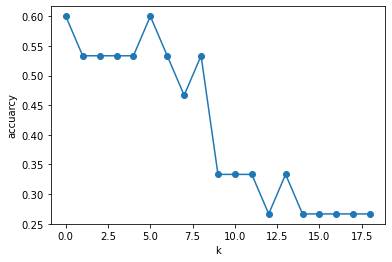

In [51]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuarcy')
plt.plot(acc_scores,marker='o')
plt.show()

It can be seen that the accuracy rate is the highest when k=5

Result visualization

In [62]:
def plot_fruit_knn(X, y, n_neighbors):

    X_mat = X[['height', 'width']].values
    y_mat = y.values
 
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF'])
 
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_mat, y_mat)
 
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)
 
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold,
                edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
 
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

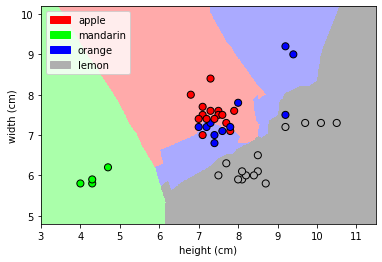

In [63]:
plot_fruit_knn(X_train,y_train,5)